In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Steph Curry Statistical Analysis
---

In [18]:
reg_szn = pd.read_csv("../data/Stephen_Curry_Regularseason_Stats.csv")
sns.set(rc = {'figure.figsize':(15,8)})

In [19]:
twentyone = reg_szn[reg_szn['Season_year'] == '2020-2021']
w_l_converted_21 = twentyone['Result'].eq('W').mul(1)
twentyone['Result'] = w_l_converted_21
twentyone

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
698,2020-2021,Regular,Sun 5/16,MEM,1,113,101,40.0,16-36,16,...,5,6,83.3,7,9,1,1,2,7,46
699,2020-2021,Regular,Tue 5/11,PHX,1,122,116,37.0,7-22,7,...,6,6,100.0,3,6,0,1,2,3,21
700,2020-2021,Regular,Mon 5/10,UTA,1,119,116,37.0,11-25,11,...,11,12,91.7,4,6,0,2,1,3,36
701,2020-2021,Regular,Sat 5/8,OKC,1,136,97,29.0,14-26,14,...,10,10,100.0,5,2,0,1,2,1,49
702,2020-2021,Regular,Thu 5/6,OKC,1,118,97,31.0,11-21,11,...,6,7,85.7,4,7,0,1,2,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2020-2021,Regular,Fri 1/1,POR,0,98,123,34.0,9-20,9,...,4,4,100.0,8,5,0,0,1,1,26
757,2020-2021,Regular,Tue 12/29,DET,1,116,106,35.0,9-17,9,...,8,8,100.0,5,6,0,2,5,8,31
758,2020-2021,Regular,Sun 12/27,CHI,1,129,128,36.0,11-25,11,...,9,9,100.0,2,6,2,2,1,4,36
759,2020-2021,Regular,Fri 12/25,MIL,0,99,138,29.0,6-17,6,...,5,5,100.0,4,6,0,1,2,2,19


In [20]:
reg_szn.columns

Index(['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score',
       'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA',
       '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF',
       'TO', 'PTS'],
      dtype='object')

## Data Cleansing and Pipelines

In [55]:
def add_advanced_stats(df):
    df['AST/TO'] = df['AST']/df['TO']
    df['eFG%'] = (df['FGM'] + (0.5 * df['3PTM'])) / df['FGA'] * 100
    df['TS%'] = (df['PTS'] / (2 * (df['FGA'] + (0.44 * df['FTA'])))) * 100
    #df['Triple Double'] = ((df['PTS'] >= 10) & (df['REB'] >= 10) & (df['AST'] >= 10)).astype(int)
    df['Game Score'] = df['PTS'] + (df['FGM'] * 0.4) + (df['FGA'] * -0.7) + ((df['FTA'] - df['FTM']) * -0.4) + (df['REB']) + df['STL'] + (df['AST'] * 0.7) + (df['BLK'] * 0.7) + (df['PF'] * -0.4) - df['TO']
    return df

In [56]:
def numeric_normalize(df):
    res = df['Result']
    df_numeric = df.select_dtypes([np.number])
    df_numeric_normalized = (df_numeric - df_numeric.mean()) / df_numeric.std()
    ret_df = df_numeric_normalized.drop('AST/TO', axis=1)
    ret_df['Result'] = res.eq('W').mul(1)
    return ret_df

In [57]:
def pipeline(df):
    df = add_advanced_stats(df)
    df = numeric_normalize(df)
    return df

In [58]:
reg_szn = add_advanced_stats(reg_szn)
reg_szn

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,AST,BLK,STL,PF,TO,PTS,AST/TO,eFG%,TS%,Game Score
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,8,1,2,0,2,42,4.000000,60.000000,69.352708,45.0
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,0,2,4,2,17,3.000000,36.666667,48.185941,16.1
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,7,0,1,2,5,25,1.400000,65.625000,67.060086,23.7
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,0,3,5,3,29,1.333333,65.789474,69.845857,29.5
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,14,0,7,4,4,27,3.500000,61.363636,61.363636,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2020-2021,Regular,Fri 1/1,POR,L,98,123,34.0,9-20,9,...,5,0,0,1,1,26,5.000000,55.000000,59.742647,25.7
757,2020-2021,Regular,Tue 12/29,DET,W,116,106,35.0,9-17,9,...,6,0,2,5,8,31,0.750000,67.647059,75.536062,23.9
758,2020-2021,Regular,Sun 12/27,CHI,W,129,128,36.0,11-25,11,...,6,2,2,1,4,36,1.500000,54.000000,62.154696,28.1
759,2020-2021,Regular,Fri 12/25,MIL,L,99,138,29.0,6-17,6,...,6,0,1,2,2,19,3.000000,41.176471,49.479167,15.9


## Exploratory Data Analysis

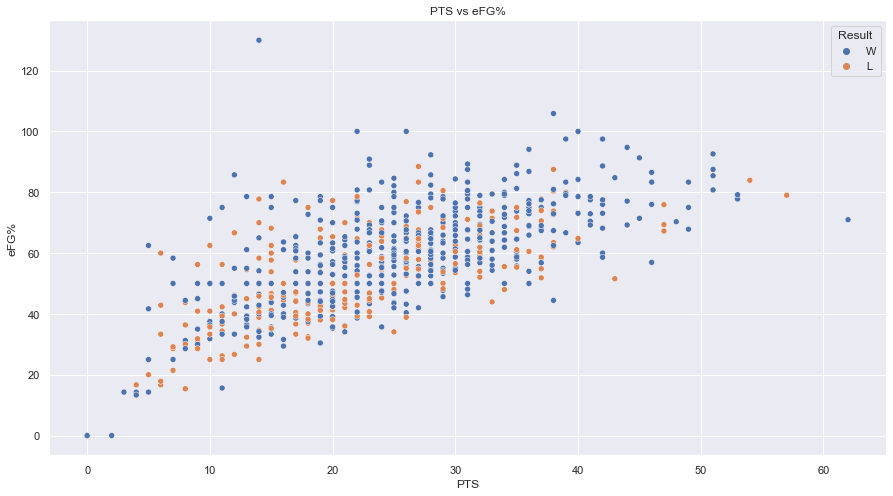

In [25]:
sns.scatterplot(data=reg_szn, x='PTS', y='eFG%', hue='Result');
plt.title('PTS vs eFG%');

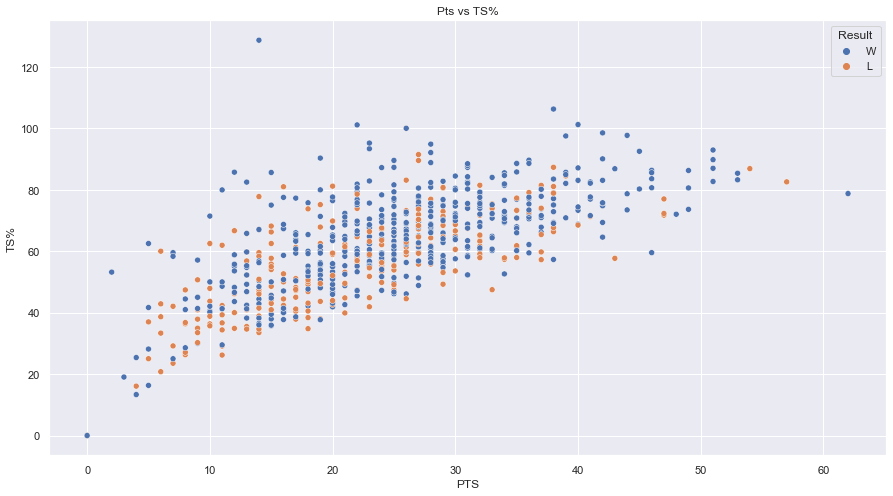

In [26]:
sns.scatterplot(data=reg_szn, x='PTS', y='TS%', hue='Result');
plt.title('Pts vs TS%');

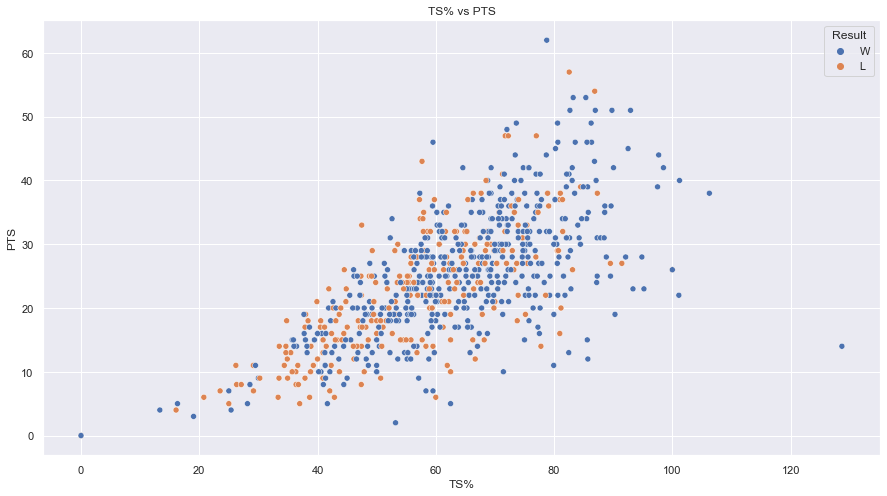

In [27]:
sns.scatterplot(data=reg_szn, x='TS%', y='PTS', hue='Result');
plt.title('TS% vs PTS');

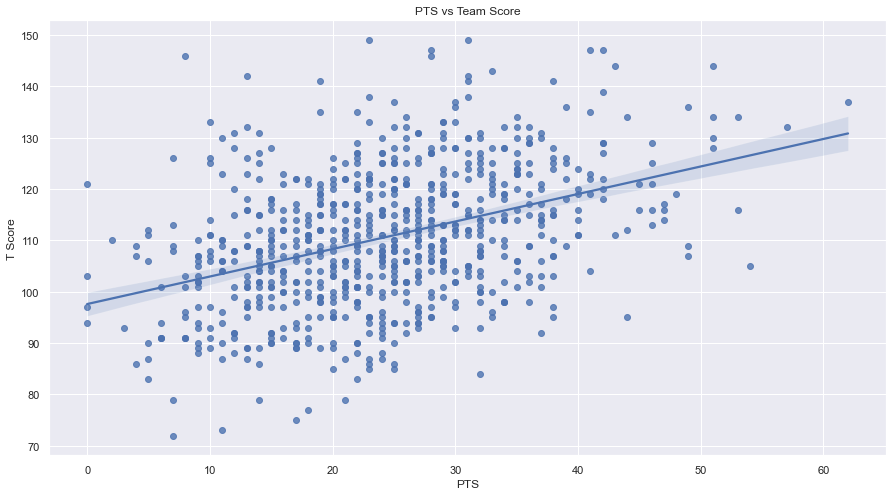

In [28]:
sns.regplot(data=reg_szn, x='PTS', y='T Score');
plt.title('PTS vs Team Score');

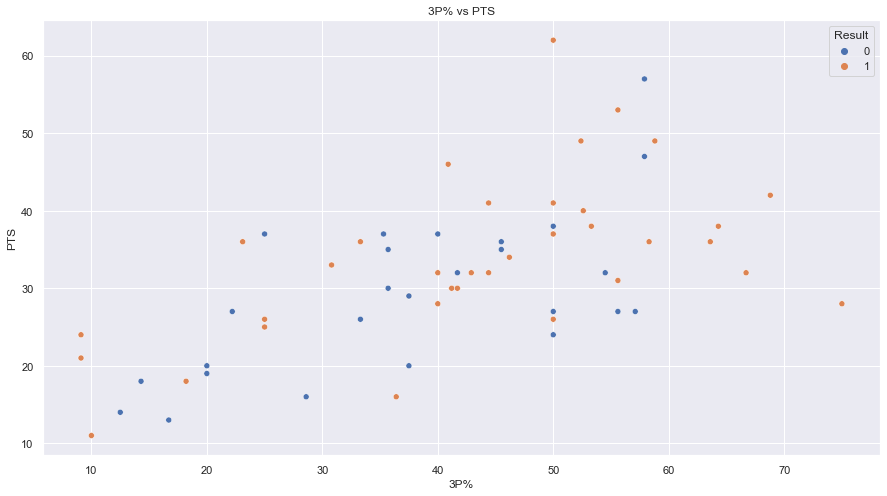

In [29]:
sns.scatterplot(data=twentyone, x='3P%', y='PTS', hue='Result');
plt.title('3P% vs PTS');

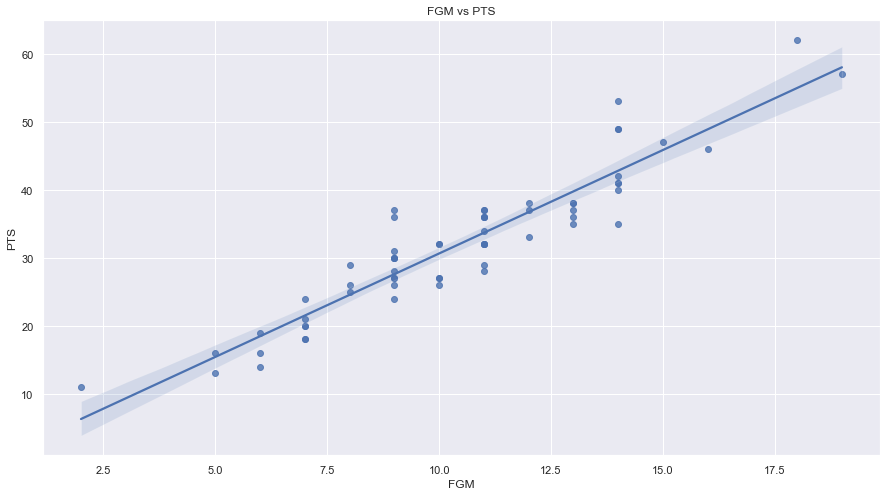

In [30]:
sns.regplot(x='FGM', y='PTS', data=twentyone);
plt.title('FGM vs PTS');

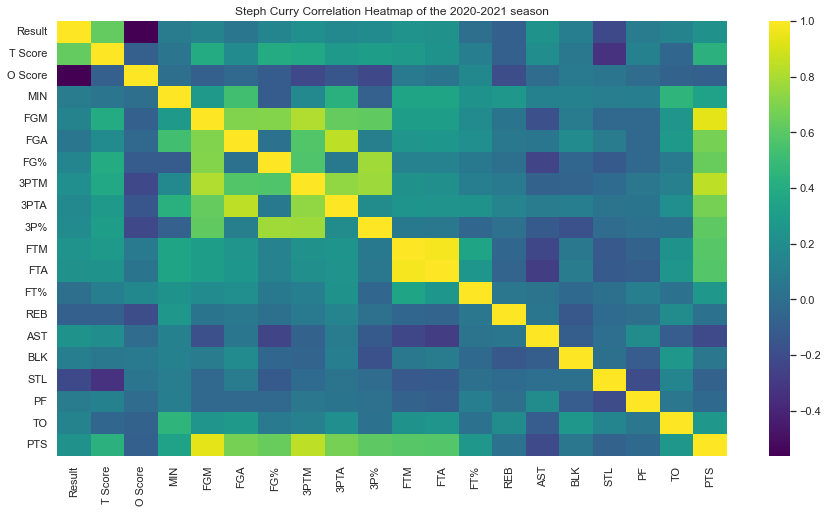

In [31]:
twenty_one_numeric = reg_szn.select_dtypes([np.number])
df_numeric_normalized = (twenty_one_numeric - twenty_one_numeric.mean()) / twenty_one_numeric.std()
correlation = twentyone.corr()
sns.heatmap(correlation, cmap='viridis');
plt.title('Steph Curry Correlation Heatmap of the 2020-2021 season');

### Regular vs Post Season analysis

In [32]:
post_szn = pd.read_csv("../data/Stephen_Curry_Postseason_Stats.csv").drop(labels='Season_div', axis=1)
post_szn_w_l_converted = post_szn['Result'].eq('W').mul(1)
post_szn['Result'] = post_szn_w_l_converted
post_szn.sort_values(by='3P%', ascending=False)


,Season_year,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,FGA,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
107,2018-2019,Wed 4/24,LAC,0,121,129,38.0,7-15,7,15,...,6,6,100.0,3,4,1,0,2,3,24
27,2014-2015,Sat 5/23,HOU,1,115,80,35.0,12-19,12,19,...,9,10,90.0,5,7,1,2,2,4,40
36,2014-2015,Sat 4/25,NOP,1,109,98,38.0,11-20,11,20,...,11,12,91.7,8,9,0,1,4,5,39
57,2015-2016,Sat 4/16,HOU,1,104,78,20.0,8-13,8,13,...,3,3,100.0,7,2,0,3,0,4,24
111,2018-2019,Sat 4/13,LAC,1,121,104,37.0,11-16,11,16,...,8,9,88.9,15,7,1,0,4,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2015-2016,Sun 4/24,HOU,1,121,94,19.0,2-9,2,9,...,1,1,100.0,0,5,0,1,0,5,6
23,2014-2015,Sun 6/7,CLE,0,93,95,42.0,5-23,5,23,...,7,8,87.5,6,5,0,0,4,6,19
84,2017-2018,Wed 5/16,HOU,0,105,127,34.0,7-19,7,19,...,1,1,100.0,7,7,0,0,3,2,16
108,2018-2019,Sun 4/21,LAC,1,113,105,35.0,3-14,3,14,...,5,5,100.0,10,7,0,3,4,3,12


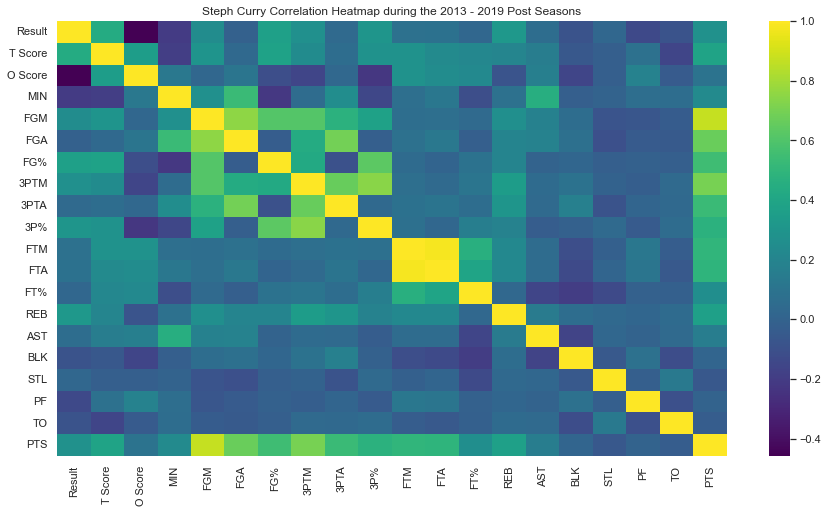

In [33]:
post_szn_numeric = post_szn.select_dtypes([np.number])
post_szn_numeric_normalized = (post_szn_numeric - post_szn_numeric.mean()) / post_szn_numeric.std()
sns.heatmap(post_szn_numeric_normalized.corr(), cmap='viridis');
plt.title('Steph Curry Correlation Heatmap during the 2013 - 2019 Post Seasons');
    

In [34]:
win_median = np.median(reg_szn[reg_szn['Result'] == 'W']['PTS'])
lose_median = np.median(reg_szn[reg_szn['Result'] == 'L']['PTS'])
print(win_median, lose_median)

25.0 21.0


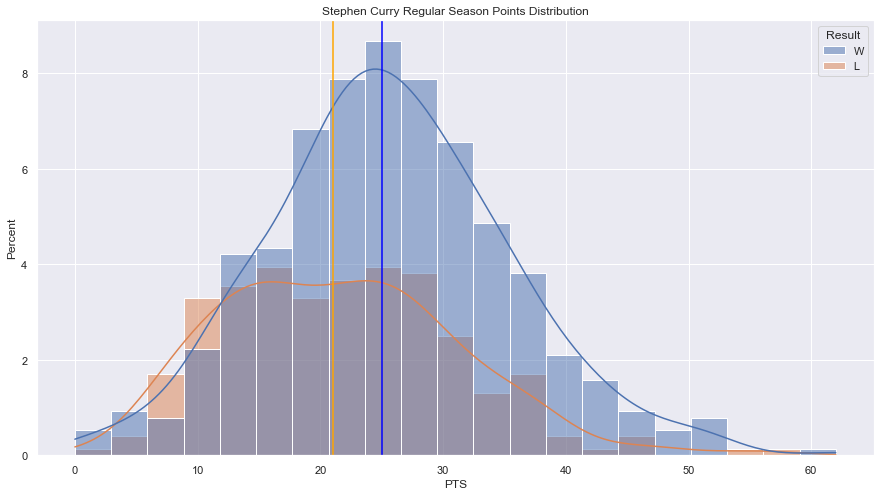

In [35]:
sns.histplot(data=reg_szn, x='PTS', stat='percent', hue='Result', kde=True);
plt.title('Stephen Curry Regular Season Points Distribution');
plt.axvline(win_median, color='Blue');
plt.axvline(lose_median, color='Orange');

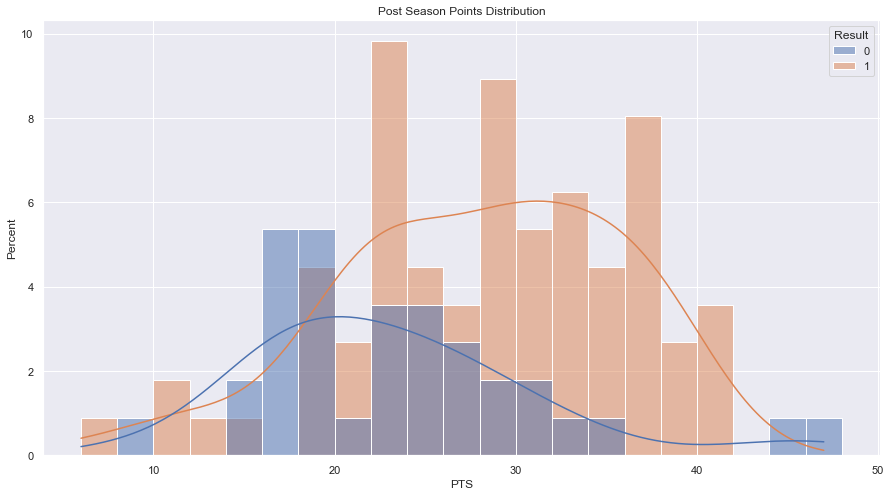

In [36]:
sns.histplot(data=post_szn, x='PTS', stat='percent', hue='Result', kde=True, binwidth=2);
plt.title('Post Season Points Distribution');

In [37]:
twentyone_sixteen = reg_szn[(reg_szn['Season_year'] == '2020-2021') | (reg_szn['Season_year'] == '2015-2016')]
twentyone_sixteen.head()

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,AST,BLK,STL,PF,TO,PTS,AST/TO,eFG%,TS%,Game Score
415,2015-2016,Regular,Wed 4/13,MEM,W,125,104,30.0,15-24,15,...,6,0,2,2,2,46,3.00,83.333333,86.336336,45.4
416,2015-2016,Regular,Sun 4/10,SAS,W,92,86,35.0,13-22,13,...,5,0,2,4,4,37,1.25,68.181818,73.763955,37.3
417,2015-2016,Regular,Sat 4/9,MEM,W,100,99,34.0,7-22,7,...,8,0,1,1,2,17,4.00,38.636364,38.636364,20.0
418,2015-2016,Regular,Thu 4/7,SAS,W,112,101,36.0,11-19,11,...,9,0,2,2,3,27,3.00,65.789474,67.907445,31.4
419,2015-2016,Regular,Tue 4/5,MIN,L,117,124,43.0,7-25,7,...,15,0,3,4,3,21,5.00,36.000000,39.893617,25.8


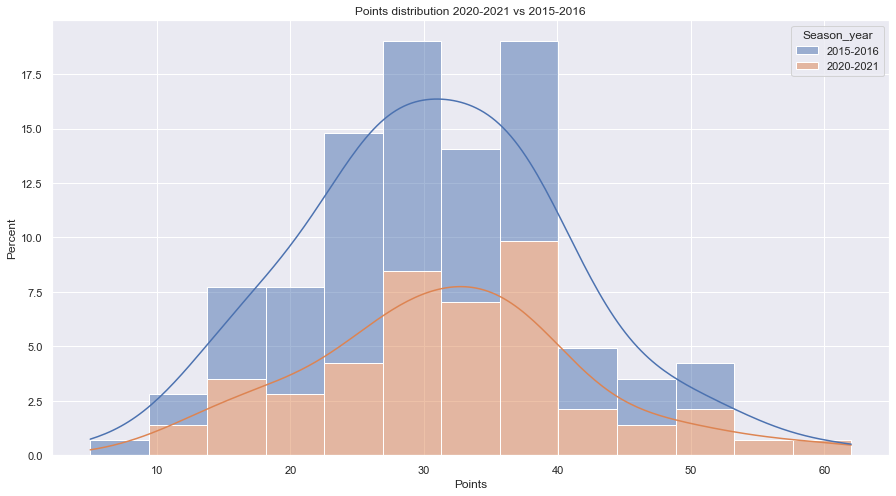

In [38]:
sns.histplot(data=twentyone_sixteen, x='PTS', stat='percent', kde=True, hue='Season_year', multiple='stack');
plt.xlabel('Points')
plt.title('Points distribution 2020-2021 vs 2015-2016');

In [39]:
reg_szn.columns

Index(['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score',
       'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA',
       '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF',
       'TO', 'PTS', 'AST/TO', 'eFG%', 'TS%', 'Game Score'],
      dtype='object')

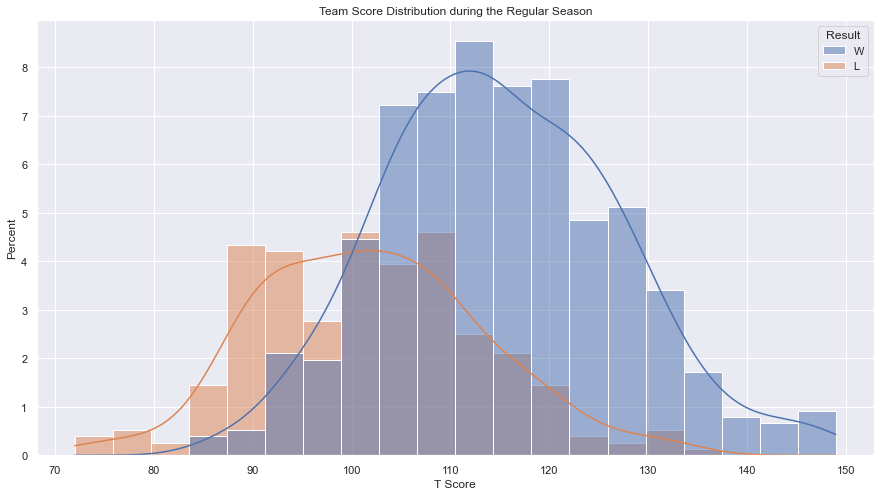

In [40]:
sns.histplot(data=reg_szn, x='T Score', stat='percent', hue='Result', kde=True);
plt.title('Team Score Distribution during the Regular Season');

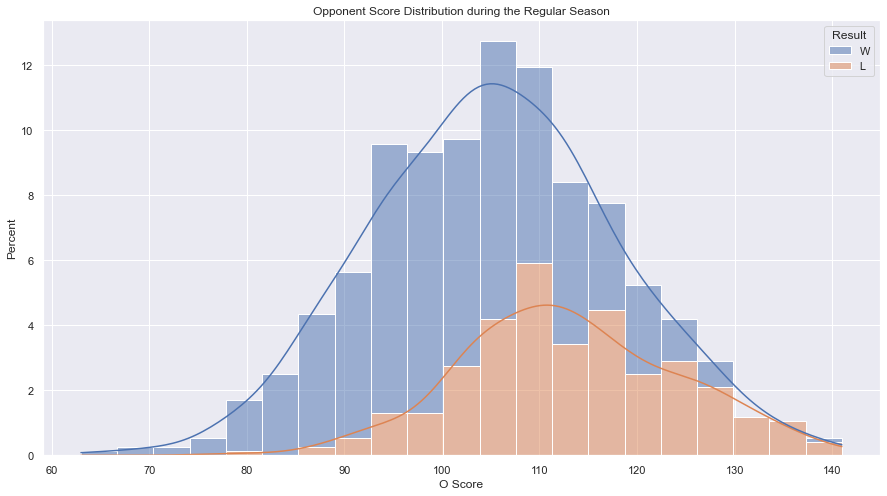

In [41]:
sns.histplot(data=reg_szn, x='O Score', stat='percent', hue='Result', kde=True, multiple='stack');
plt.title('Opponent Score Distribution during the Regular Season');

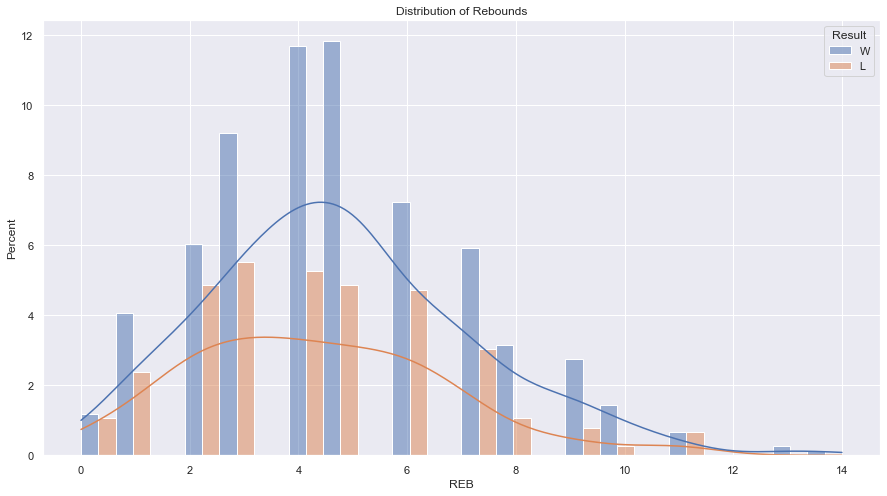

In [42]:
sns.histplot(data=reg_szn, x='REB', stat='percent', hue='Result', multiple='dodge', kde=True);
plt.title('Distribution of Rebounds');

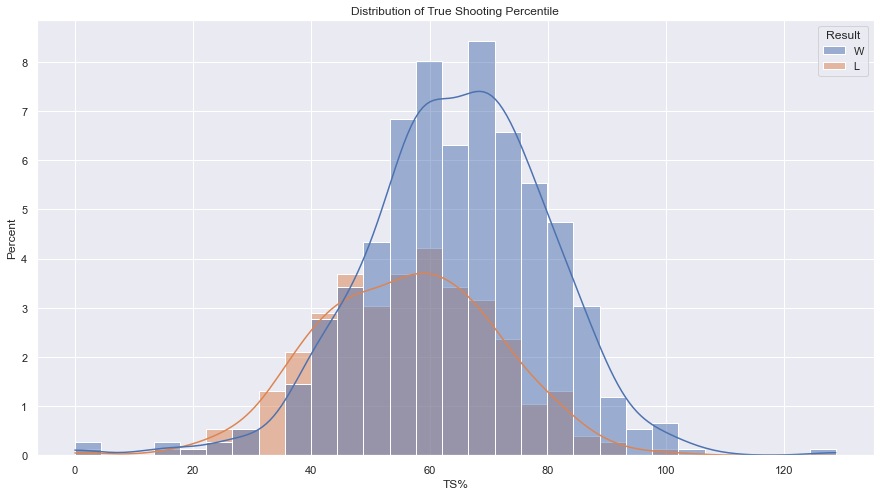

In [43]:
sns.histplot(data=reg_szn, x='TS%', hue='Result', stat='percent', kde=True);
plt.title('Distribution of True Shooting Percentile');

## Win/Loss Prediction

In [59]:
reg_szn_x = pipeline(reg_szn).dropna(axis=0)
reg_szn_x.drop('T Score', axis=1, inplace=True)
reg_szn_x

,O Score,MIN,FGM,FGA,FG%,3PTM,3PTA,3P%,FTM,FTA,...,AST,BLK,STL,PF,TO,PTS,eFG%,TS%,Game Score,Result
0,0.837151,2.248077,1.394879,1.441329,0.383703,0.114576,-0.656320,1.282571,2.741747,2.453538,...,0.509964,1.600215,0.240968,-1.682282,-0.614397,1.785075,0.150771,0.483928,2.343154,1
1,-0.186700,1.093922,-0.995220,-0.473231,-1.080162,-1.119275,-1.162359,-0.884505,0.725835,0.557962,...,-0.193084,-0.439590,0.240968,1.084258,-0.614397,-0.725352,-1.253441,-0.852755,-0.610520,0
2,0.915909,0.104647,0.199829,-0.281775,0.720314,-0.296708,-0.656320,0.414701,0.053864,0.557962,...,0.158440,-0.439590,-0.519932,-0.299012,0.997865,0.077985,0.489287,0.339148,0.166225,1
3,0.128331,1.093922,0.498592,0.292593,0.430672,0.525859,0.355756,0.414701,0.053864,-0.073897,...,-0.896132,-0.439590,1.001869,1.775893,-0.076976,0.479653,0.499185,0.515070,0.759003,0
4,0.128331,1.588560,1.096116,0.866961,0.579407,-0.296708,-0.909340,0.934384,-1.290078,-1.337614,...,2.619108,-0.439590,4.045469,1.084258,0.460445,0.278819,0.232836,-0.020583,1.382443,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1.388455,-0.060232,0.199829,0.484049,-0.164268,0.114576,0.861795,-0.453169,0.053864,-0.073897,...,-0.544608,-0.439590,-1.280832,-0.990647,-1.151818,0.178402,-0.150131,-0.122948,0.370631,0
757,0.049573,0.104647,0.199829,-0.090319,0.454156,0.525859,0.102737,0.705724,1.397806,1.189821,...,-0.193084,-0.439590,0.240968,1.775893,2.610127,0.680487,0.610975,0.874407,0.186665,1
758,1.782244,0.269527,0.797354,1.441329,-0.242549,0.525859,1.620852,-0.453169,1.733791,1.505750,...,-0.193084,3.640020,0.240968,-0.990647,0.460445,1.182572,-0.210312,0.029373,0.615919,1
759,2.569822,-0.884628,-0.696458,-0.090319,-0.923599,-0.707992,0.355756,-1.144347,0.389849,0.242033,...,-0.193084,-0.439590,-0.519932,-0.299012,-0.614397,-0.524517,-0.982039,-0.771088,-0.630961,0


In [60]:
X = reg_szn_x.drop('Result', axis=1)
X

,O Score,MIN,FGM,FGA,FG%,3PTM,3PTA,3P%,FTM,FTA,...,REB,AST,BLK,STL,PF,TO,PTS,eFG%,TS%,Game Score
0,0.837151,2.248077,1.394879,1.441329,0.383703,0.114576,-0.656320,1.282571,2.741747,2.453538,...,1.829398,0.509964,1.600215,0.240968,-1.682282,-0.614397,1.785075,0.150771,0.483928,2.343154
1,-0.186700,1.093922,-0.995220,-0.473231,-1.080162,-1.119275,-1.162359,-0.884505,0.725835,0.557962,...,0.165116,-0.193084,-0.439590,0.240968,1.084258,-0.614397,-0.725352,-1.253441,-0.852755,-0.610520
2,0.915909,0.104647,0.199829,-0.281775,0.720314,-0.296708,-0.656320,0.414701,0.053864,0.557962,...,0.997257,0.158440,-0.439590,-0.519932,-0.299012,0.997865,0.077985,0.489287,0.339148,0.166225
3,0.128331,1.093922,0.498592,0.292593,0.430672,0.525859,0.355756,0.414701,0.053864,-0.073897,...,1.829398,-0.896132,-0.439590,1.001869,1.775893,-0.076976,0.479653,0.499185,0.515070,0.759003
4,0.128331,1.588560,1.096116,0.866961,0.579407,-0.296708,-0.909340,0.934384,-1.290078,-1.337614,...,1.413328,2.619108,-0.439590,4.045469,1.084258,0.460445,0.278819,0.232836,-0.020583,1.382443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1.388455,-0.060232,0.199829,0.484049,-0.164268,0.114576,0.861795,-0.453169,0.053864,-0.073897,...,1.413328,-0.544608,-0.439590,-1.280832,-0.990647,-1.151818,0.178402,-0.150131,-0.122948,0.370631
757,0.049573,0.104647,0.199829,-0.090319,0.454156,0.525859,0.102737,0.705724,1.397806,1.189821,...,0.165116,-0.193084,-0.439590,0.240968,1.775893,2.610127,0.680487,0.610975,0.874407,0.186665
758,1.782244,0.269527,0.797354,1.441329,-0.242549,0.525859,1.620852,-0.453169,1.733791,1.505750,...,-1.083096,-0.193084,3.640020,0.240968,-0.990647,0.460445,1.182572,-0.210312,0.029373,0.615919
759,2.569822,-0.884628,-0.696458,-0.090319,-0.923599,-0.707992,0.355756,-1.144347,0.389849,0.242033,...,-0.250955,-0.193084,-0.439590,-0.519932,-0.299012,-0.614397,-0.524517,-0.982039,-0.771088,-0.630961


In [61]:
y = reg_szn_x['Result']
y

0      1
1      0
2      1
3      0
4      1
      ..
756    0
757    1
758    1
759    0
760    0
Name: Result, Length: 760, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=23)

In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True, solver = 'lbfgs')

lr.fit(X_train, Y_train)
lr.intercept_, lr.coef_

(array([1.12119896]),
 array([[-1.50387182, -0.85066136,  0.23336487, -0.59914698, -0.0764499 ,
         -0.2953948 ,  0.77262745,  0.40710511,  0.08832624,  0.33561736,
          0.1346881 ,  0.07473943,  0.6024222 ,  0.10342483,  0.12007918,
         -0.05923051, -0.25887997,  0.11114874,  0.04324078,  0.10031172,
          0.5497163 ]]))

In [83]:
train_accuracy = sum(lr.predict(X_train) == Y_train) / len(Y_train)
test_accuracy = sum(lr.predict(X_test) == Y_test) / len(Y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8085
Test accuracy: 0.7632


In [69]:
Y_test_pred = lr.predict(X_test)

precision = sum((Y_test_pred == Y_test) & (Y_test_pred == 1)) / sum(Y_test_pred)
recall = sum((Y_test_pred == Y_test) & (Y_test_pred == 1)) / sum(Y_test)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.8750
recall = 0.8550


In [79]:
arr = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.10, random_state=i)
    lr = LogisticRegression(fit_intercept=True, solver = 'lbfgs')
    lr.fit(X_train, Y_train)
    train_accuracy = sum(lr.predict(X_train) == Y_train) / len(Y_train)
    test_accuracy = sum(lr.predict(X_test) == Y_test) / len(Y_test)
    arr.append(test_accuracy)

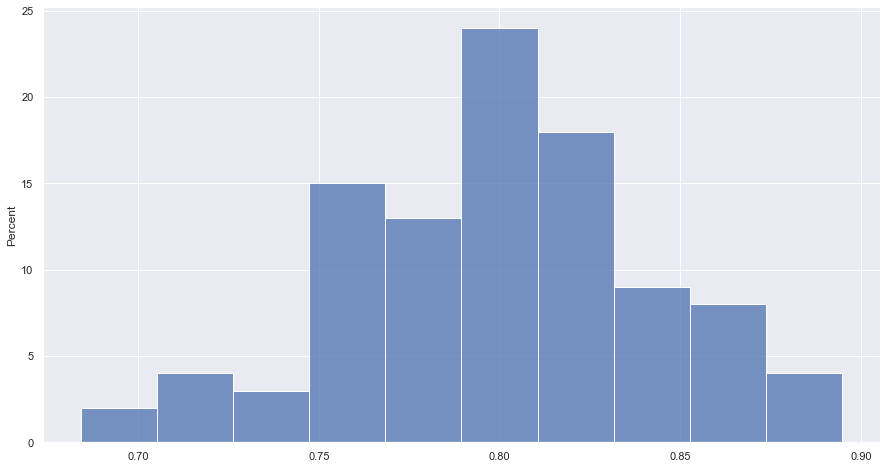

In [80]:
sns.histplot(x=arr,stat='percent');